# Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

In order to complete the project, we are going to follow below high level steps to build and select best model.
- Read the dataset and perform exploratory data analysis
- Building different classification models on the unbalanced data
- Building different models on 3 different balancing technique.
    - SMOTE
    - Decision Tree
    - Random Forest

# The Dataset

In this project, we are examining the Credit Card Transactions Fraud Detection Dataset which contains both a training dataset and a testing dataset. We will first perform an exploratory data analysis to the training data to understand which features might be correlated to fraudulent activities and then attempt to create models with those features and test out their predicitve effectiveness. 

# Load all libraries to be used

In [4]:
# Importing computational packages
import numpy as np
import pandas as pd
# Importing visualization packages
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

In [5]:
# Importing model building packages
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

In [7]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print("\n\n")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Load the dataset

In [8]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
# displays the dimentions of the data
df.shape

(1296675, 23)

In [10]:
# shows statistical summary of the data
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
# observe the different feature type present in the data
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

As can be seen from the results above, the training dataset contains 23 columns that detail the time of the credit card transaction, the merchant, the spending category, the transaction amount, and personal infomration about the credit card holders, including their names, genders, locations and birthdays. It also contains a column called "is_fraud" which marks fraudulent transactions as 1 and non-fraudulent as 0. 

### handle missing values

In [13]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Unnamed: 0,0,0.0
zip,0,0.0
merch_long,0,0.0
merch_lat,0,0.0
unix_time,0,0.0
trans_num,0,0.0
dob,0,0.0
job,0,0.0
city_pop,0,0.0
long,0,0.0


In [14]:
df.drop_duplicates(inplace=True)

There is no missing data in the dataset and we also remove any duplicated observations in the data set to make it ready for further analysis.

### Observe the distribution of our classes

In [15]:
classes=df['is_fraud'].value_counts()
normal_share=round(classes[0]/df['is_fraud'].count()*100,2)
fraud_share=round(classes[1]/df['is_fraud'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.42 %
    Fraudulent : 0.58 %


In [16]:
labels=["Genuine","Fraud"]

fraud_or_not = df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["#3FC0BF","#C03F40"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In the case of the Credit Card Fraud dataset, severe imbalance is observed.

Oversampling or undersampling should be considered.

# Exploratory Data Analysis
## 1. Transaction amount vs Fraud


With the dataset cleaned, we can observe how each of the features relate to fraud. first we will see how transaction amounts relate to fraud, and since the transaction amounts have high variance of outliers and the 99th percentile of transactions is $545 we will only look at the data till $1000, in order to not skew the data towards the outliers, to make it more readable 

In [17]:
np.percentile(df['amt'],99)

545.9926000000002

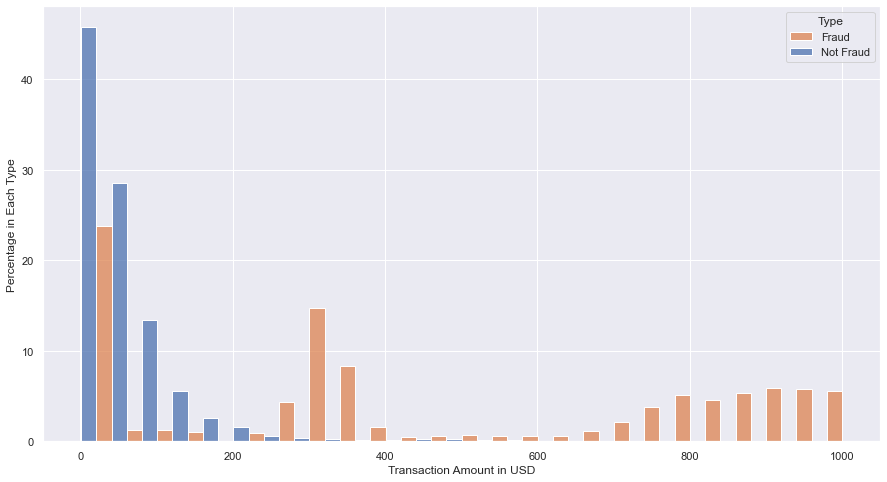

In [24]:
# setting figure size 
sns.set(rc = {'figure.figsize':(15,8)})

#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

We can see that most normal(non-fraud) transactions are in the range of (0$-200$), and fraudulent transactions peak at around the $300-$350 range, and then again at the range of $800-$1000, we can gain insightful information from the pattern! 

## 2. Gender vs Fraud
Second, we will examine whether one gender is more susceptible to fraud than the other.

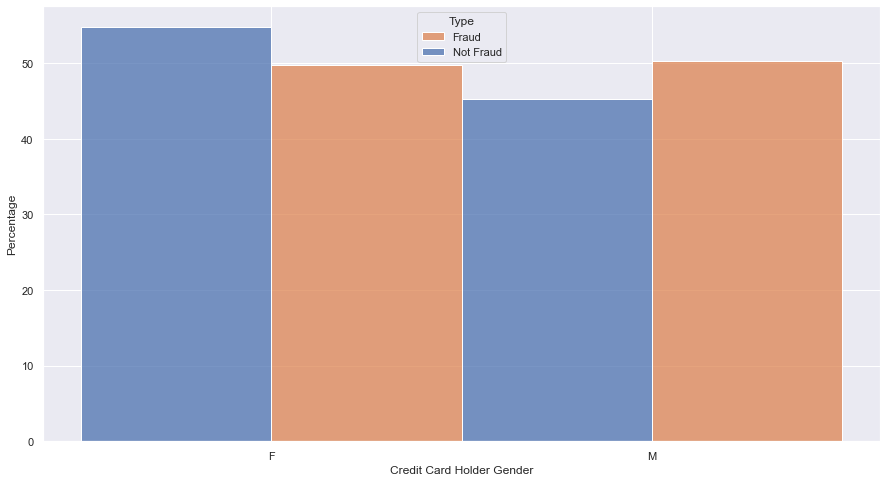

In [25]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

As we can see, not much information is to be gained from the plot, since the percenantage of fraud between males and females are almost exactly equal.
which makes gender a bad indicator of fraud.

## 3. Age vs Fraud
Third, we examine how age relates to fraud. Are older or younger people more prone to credit card fraud? Given the birthday info, we can calculate the age of each card owner (in 2023) and see whether we can infer a pattern and get valueable infomation from it. 

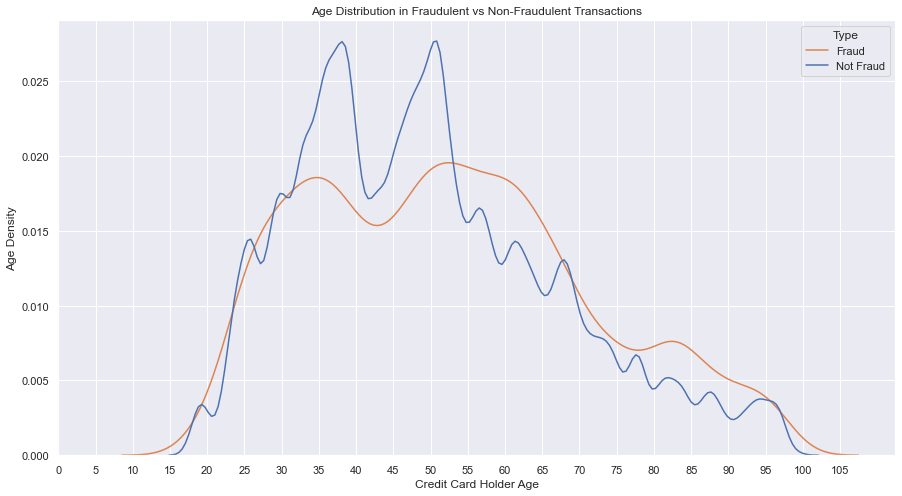

In [26]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Age Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution has a clear difference between them, as the normal(non-fraud) transactions peak at around ages 37 and 50. fraudulent transactions however are alot smoother yet still has 2 main peaks at around ages 30-40 and 50-65 which would suggest that older people are more prone to fraudulent transactions.

## 4. Spending Category vs Fraud
Fourth, we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if 'grocery_pos' accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

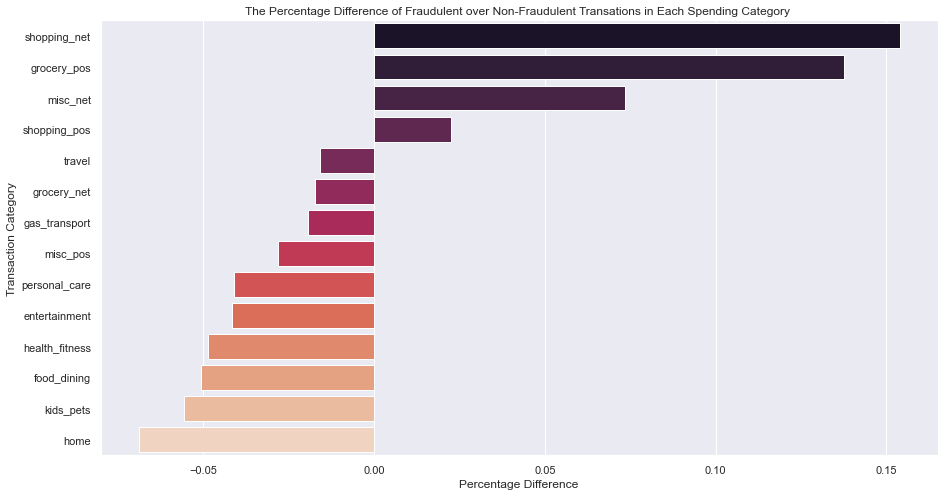

In [27]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False),  hue="category", legend=False, palette="rocket")
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

what we can infer from the bar plot is that some spending categories commit fraud more than others, specifically "shopping_net", "grocery_pos", "misc_net", and "shopping_pos" have a higher chance to be a fraudulent transaction, the other categories tend to see more normal transactions.

## 5. Time vs Fraud

Next, we examine the relation between time and fraud, are there times that more likely for fraud, or is there no noticeable relation between them

<ipython-input-28-c18ccc203a73>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



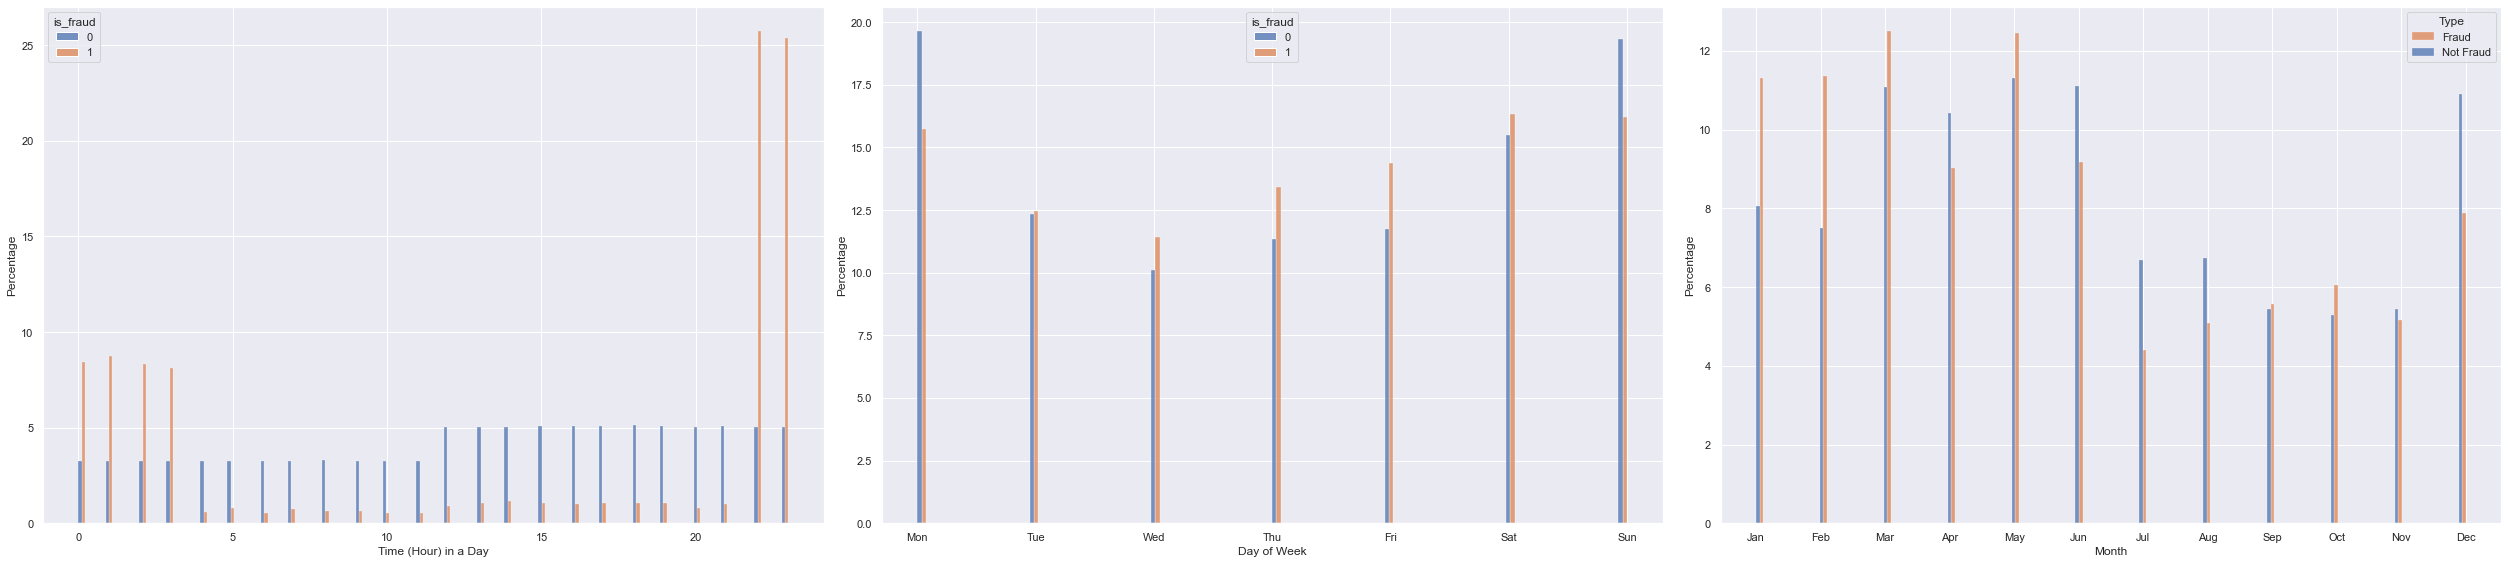

In [28]:
fig,axs = plt.subplots(1,3, figsize = (35,8))

df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent', ax=axs[0],multiple='dodge' )
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ay=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge', ax=axs[1])
ay.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ay.set_ylabel('Percentage')
ay.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
az=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge', ax=axs[2])
az.set_ylabel('Percentage')
az.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
az.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fig.tight_layout()


- Hours: A large relation is obvious, the hours between 10:00 pm and 3:00 am are very high which is when most people are asleep, especially hours 10 and 11 pm which are exceedingly high

- Days: Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week. 

- Months: Very interesting results! While normal payments peak around December (new years), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

## 6. State vs Fraud
let's also explore which geographies are more prone to fraud. we will calculate the difference in geographical distribution between the 2 transaction types.

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

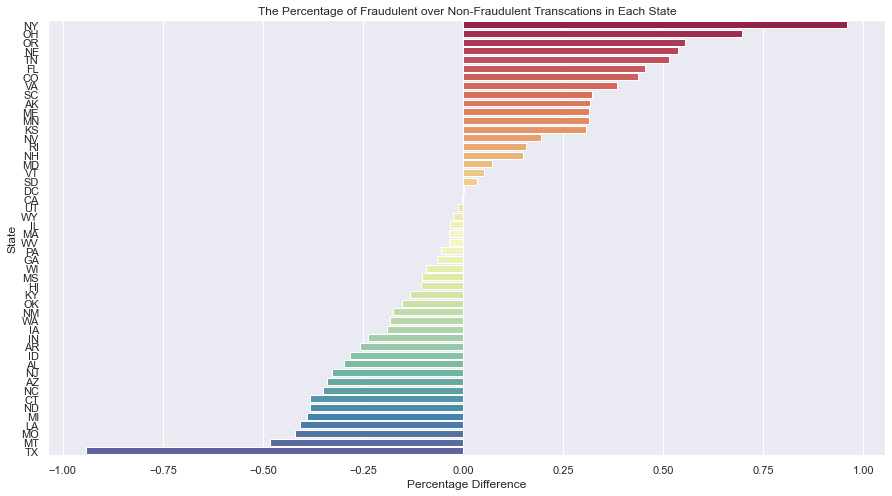

In [29]:
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State', hue="State", legend=False, palette="Spectral")
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

As can be seen, NY and OH among others have a higher percentage of fraudulent transactions than normal ones, while TX and MT are the opposite.

## 6. Population vs Fraud
let's see if the population count of the city the fraud has taken place can provide useful information regarding fraud

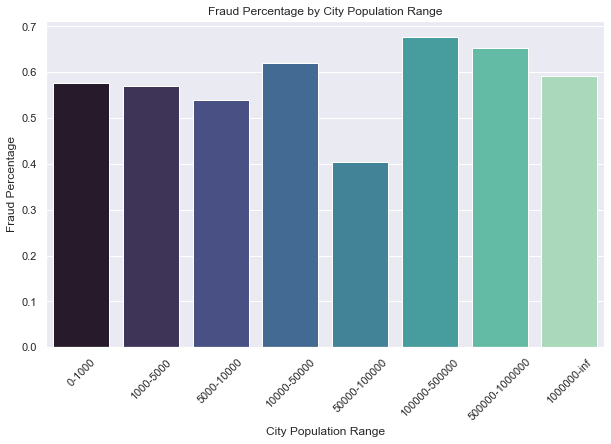

In [30]:
population_ranges = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]


# Create a new column for population ranges
df['pop_range'] = pd.cut(df['city_pop'], bins=population_ranges, labels=[f'{i}-{j}' for i, j in zip(population_ranges[:-1], population_ranges[1:])])

# Calculate the fraud percentage for each population range
fraud_percentage = df.groupby('pop_range')['is_fraud'].sum() / df.groupby('pop_range')['is_fraud'].count()* 100

# Use Seaborn to create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette="mako", legend=False, hue=fraud_percentage.index)
plt.title('Fraud Percentage by City Population Range')
plt.xlabel('City Population Range')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)
plt.show()

there is a slight difference between small cities and large cities as cities between 0-10000 are a little less likely to be fraudulent, the range between 50000-100000 has a significant dip in fraudulent activity, almost half the percentage of other cities, and larger cities 100000+ have higher change of fraud.

# Data Modeling and Prediction

Based on our Data Analysis above, we have found out that the features including transaction amount, credit card holder age, spending category, transaction time, population,  and locations all have varying degrees of correlations with credit card fraud. This helps us choose which features we want to include in our data models. The plan is to train the models on the training data set which we have analyzed above and then use the testing dataset to evaluate the model performance.

As data models need numeric input, we need to convert some of our categorical observations into numeric ones. For transaction locations and merchant locations, we already have the longitudinal and latitudinal data. But for shopping categories, we need convert them into dummy variables using pandas.get_dummies.

In [31]:
#subset the training data to include only the features that we need
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [32]:
#let's do the same to the testing dataset
test=pd.read_csv('fraudTest.csv')
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

Now with both datasets cleaned and organized, we can start building models with them. We will first try to use Logistic Regression combined with confusion matrix to evaluate the model. As is very common with fraud data, there is always the issue of class imbalance where actual fraud cases are way fewer than normal cases and constitute only a very small part of the dataset. To counter this imbalance, it's important to use the SMOTE (Synthetic Minority Oversampling Technique) method to resample the training dataset so that the model can be trained on more balanced data for better results.

## SMOTE

In [33]:
#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[524691  28883]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


To evaluate fraud detection models, the concepts of sensitivty/recall and precision are very important. Recall is True Positives/(True Positives + False Negatives), which meaures how many fraud cases fly under the radar while precision (True Positives/(True Positives + False Positives)) evaluates how good the model is at generating as fewer false alarms as possible. For fraud detection, we want to prioritize high recall to leave out as few fraud cases as possible while also having a relatively high precision because too many false alarms can also be a problem!

In the Logistic Regression model above, the recall is around 0.75 and the general accuracy of the model is around 0.95, which is lower than the actual share of non-fraud cases in the testing dataset. Both metrics seem to suggest that the model does not add very much to detecting fraud. Moreover, the Precision of the model is only 0.05: too many false positives to be actually useful!

We will now try using another algorithm--Random Forest, to see if a better model can be created.

## Decision Tree

In [41]:
# Create the parameter grid 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,45.125565,1.453575,0.584170,0.134239,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.974348,0.974890,0.974748,0.577206,0.974371,0.895113,0.158954,5
1,44.843204,2.360589,0.403239,0.101303,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.974348,0.974890,0.974748,0.577206,0.974371,0.895113,0.158954,5
2,47.157427,1.201427,0.411119,0.070303,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.974341,0.974889,0.974750,0.577207,0.974372,0.895112,0.158952,7
3,46.019517,1.394776,0.466375,0.111461,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.974341,0.974889,0.974750,0.577207,0.974372,0.895112,0.158952,7
4,76.761227,3.415865,0.323348,0.047535,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.994445,0.995117,0.995016,0.594287,0.995204,0.914814,0.160264,4


In [43]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)

Best roc auc score :  0.9149491994100842


In [44]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with optimal hyperparameters

In [45]:
# Model with optimal hyperparameters
dt_imb_model = grid_search.best_estimator_

dt_imb_model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)

In [51]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 29.83%



Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.18      0.91      0.30      2145

    accuracy                           0.98    555719
   macro avg       0.59      0.95      0.64    555719
weighted avg       1.00      0.98      0.99    555719



## Random Forest

In [49]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.88      0.72      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553355    219]
 [   590   1555]]
Share of Non-Fraud in Test Data: 0.9961


## Comparison

- The SMOTE model has the highest recall for Class 1, but its precision is very low, resulting in a low F1-score.
- The Decision Tree has a better F1-score for Class 1 compared to the SMOTE model, but its precision is still relatively low.
- The Random Forest model seems to outperform the others, having high precision, recall, and F1-score for Class 1, along with perfect accuracy.

The above metrics show that although the Random Forest model has a slightly lower recall, it has much better accuracy and precision! Although still in need of improvements, it serves as a way better basis than the Logistic Regression model above for future deployment.